In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def complete_tree(x, y, step):

  maximum_depth = 2

  # plot node
  plt.plot(x, y, 'k.')

  # define maximum recusion depth
  if step > maximum_depth:
    return

  # calculate length
  size = 2 ** (-step)

  # calculate first new node
  angle_1 = -math.pi/2 * random.random()
  new_x_1 = x + size * math.cos(angle_1)
  new_y_1 = y + size * math.sin(angle_1)

  # calculate second new node
  angle_2 = angle_1 - math.pi/2
  new_x_2 = x + size * math.cos(angle_2)
  new_y_2 = y + size * math.sin(angle_2)

  # plot edges
  plt.plot([x, new_x_1], [y, new_y_1])
  plt.plot([x, new_x_2], [y, new_y_2])

  # recurse
  branch(new_x_1, new_y_1, step+1)
  branch(new_x_2, new_y_2, step+1)

In [3]:
def stoch_tree(x, y, step):

  death_prob = 0.2

  # plot node
  plt.plot(x, y, 'k.')

  # safety
  if step > 6:
    return

  # get child coordinates
  left_x, left_y, right_x, right_y = children(x, y, step)

  # generate death probabilities
  left_died = random.random() < death_prob
  right_died = random.random() < death_prob

  # recurse left if left did not die
  if not left_died:
    plt.plot([x, left_x], [y, left_y])
    stoch_tree(left_x, left_y, step+1)

  # recurse right if right did not die
  if not right_died:
    plt.plot([x, right_x], [y, right_y])
    stoch_tree(right_x, right_y, step+1)  

In [4]:
def children(x, y, step):

  # calculate length
  # size = (random.random()/2+0.5) * 2 ** (-step)
  size = random.uniform(2**(-step), 1/(step+1))

  # calculate left child
  left_angle = -math.pi/2 * random.random()
  left_x = x + size * math.cos(left_angle)
  left_y = y + size * math.sin(left_angle)

  # calculate right child
  right_angle = (math.pi/2 * random.random()) - math.pi
  right_x = x + size * math.cos(right_angle)
  right_y = y + size * math.sin(right_angle)

  return left_x, left_y, right_x, right_y

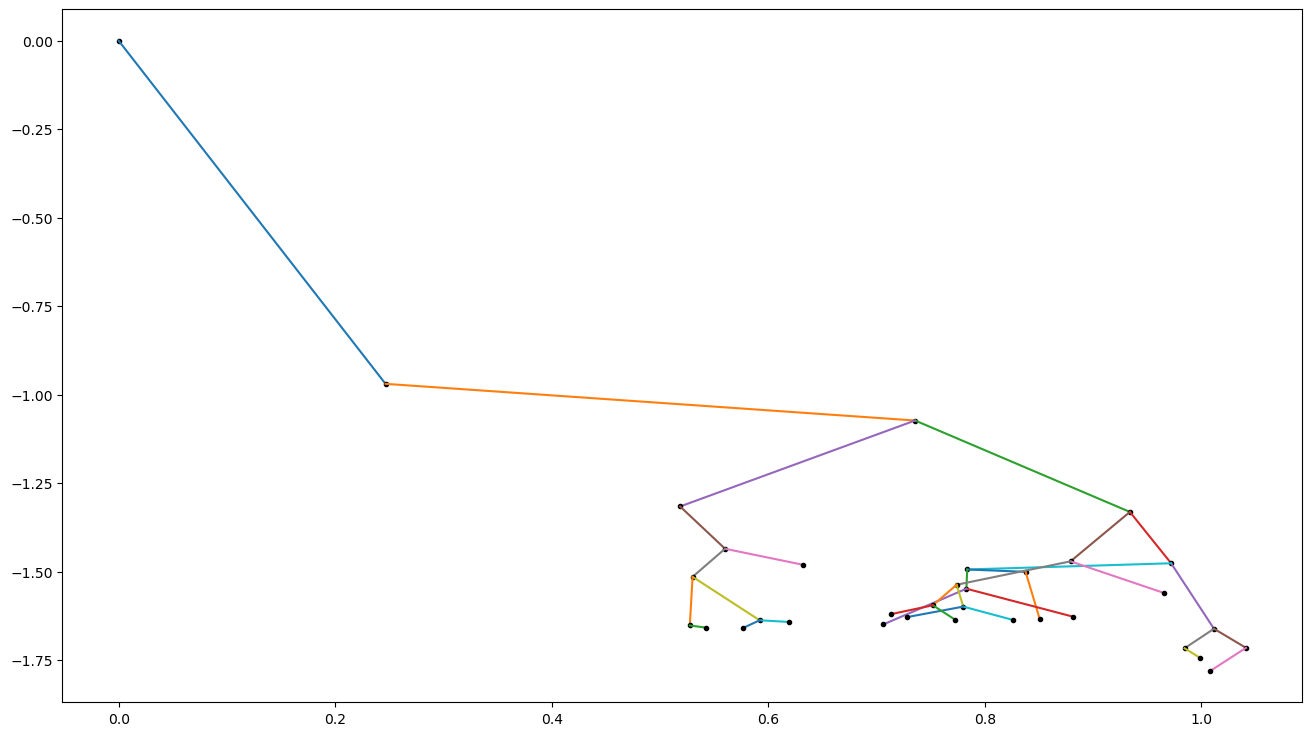

In [6]:
stoch_tree(0, 0, 0)
plt.rcParams["figure.figsize"] = (16,9)
plt.show()